In [1]:
import tensorflow as tf                                      #importing the libraries
import keras_preprocessing
from keras_preprocessing import image as ig
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
TRAINING_DIR = "Fire-Detection"  # Sets training dataset directoy
training_datagen = ImageDataGenerator(rescale = 1./255,  #Converts image into readable data
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

In [3]:
VALIDATION_DIR = "validation"  #Sets validation directory
validation_datagen = ImageDataGenerator(rescale = 1./255) #Converts image into readable data 
train_generator = training_datagen.flow_from_directory(TRAINING_DIR, # Imports and organizes necessary training data into required format
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 64)

Found 651 images belonging to 2 classes.


In [4]:
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,            
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)  # Imports and organizes necessary validation data into required format

Found 999 images belonging to 2 classes.


In [5]:
from tensorflow.keras.optimizers import Adam  #Imports Adam optimzer which is good for something with many parameters and catagorical data. Uses stochastic gradient descent.
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)), tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='softmax')]) #The neural network

In [6]:
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc']) #Compiles model

In [7]:
history = model.fit(
train_generator,
steps_per_epoch = 10,
epochs = 50,
validation_data = validation_generator,
validation_steps = 15
) #Shows us the history of model training and important parameters like the loss which helps with hyper parameter tuning. 

Epoch 1/50
10/10 [==============================] - 25s 2s/step - loss: 0.5329 - acc: 0.7526 - val_loss: 0.6255 - val_acc: 0.7458
Epoch 2/50
10/10 [==============================] - 22s 2s/step - loss: 0.4071 - acc: 0.8290 - val_loss: 0.8883 - val_acc: 0.7458
Epoch 3/50
10/10 [==============================] - 23s 3s/step - loss: 0.3503 - acc: 0.8245 - val_loss: 1.0970 - val_acc: 0.7542
Epoch 4/50
10/10 [==============================] - 22s 2s/step - loss: 0.3109 - acc: 0.8422 - val_loss: 1.1380 - val_acc: 0.4167
Epoch 5/50
10/10 [==============================] - 24s 2s/step - loss: 0.2943 - acc: 0.8840 - val_loss: 1.2907 - val_acc: 0.3125
Epoch 6/50
10/10 [==============================] - 23s 2s/step - loss: 0.2814 - acc: 0.8620 - val_loss: 1.4929 - val_acc: 0.3792
Epoch 7/50
10/10 [==============================] - 23s 2s/step - loss: 0.2792 - acc: 0.8820 - val_loss: 1.4687 - val_acc: 0.2833
Epoch 8/50
10/10 [==============================] - 22s 2s/step - loss: 0.2826 - acc: 0.87

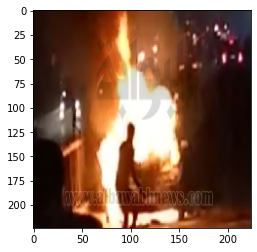

In [3]:
img1 = ig.load_img(r'C:\Users\Dell_Owner\Downloads\ipmv_project\forestfire1.png',target_size=(224,224)) # Loads fire testing image
img2 = ig.load_img(r'C:\Users\Dell_Owner\Downloads\ipmv_project\forestfire2.png',target_size=(224,224)) # Loads non-fire testing image
imgplot = plt.imshow(img1)
imgplot2 = plt.imshow(img2)#displays the images

In [43]:
ig1nput_arr = ig.img_to_array(img1) #Converts image to array
input_arr = np.array([ig1nput_arr])  #Converts image to numpy array
predictions1 = model.predict(input_arr) #Predicts output

In [41]:
ig1nput_arr2 = ig.img_to_array(img2)
input_arr2 = np.array([ig1nput_arr2])  
predictions2 = model.predict(input_arr2)

In [47]:
if predictions1[0][0] == 0. :
    print('Fire alert!')
else:
    print('No fire is there.') #Converts output to understandable format
    

Fire alert!


In [49]:
if predictions2[0][0] == 0. :
    print('Fire alert!')
else:
    print('No fire is there.')
    

No fire is there.
